In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import openpyxl

In [14]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [17]:
file_path = r'C:\Users\aditi\Desktop\Data Analytics_Career Foundry\Data Analytics_Immersion\Project 6\Pivoted_dataset.xlsx'

In [20]:
df = pd.read_excel(file_path)

# Data cleaning

1. I have already cleaned data using Excel and Python in previous exercise. So I am just checking data in this exercise.

In [25]:
df.columns

Index(['Location', 'Max of total_cases', 'Max of total_deaths',
       'Max of reproduction_rate', 'Max of people_vaccinated',
       'Max of people_fully_vaccinated', 'Average of aged_65_older (in %)',
       'Average of gdp_per_capita (in USD)',
       'Average of cardiovasc_death_rate (per 100,000)',
       'Average of diabetes_prevalence (%)', 'Average of female_smokers (%)',
       'Average of male_smokers (%)', 'Average of life_expectancy (in years)',
       'Max of population'],
      dtype='object')

In [28]:
df.head(20)

,Location,Max of total_cases,Max of total_deaths,Max of reproduction_rate,Max of people_vaccinated,Max of people_fully_vaccinated,Average of aged_65_older (in %),Average of gdp_per_capita (in USD),"Average of cardiovasc_death_rate (per 100,000)",Average of diabetes_prevalence (%),Average of female_smokers (%),Average of male_smokers (%),Average of life_expectancy (in years),Max of population
0,United States of America,103436829,1189083,3.61,270227181,230637348,15.413,54225.446,151.089,10.79,19.1,24.6,78.86,338289856
1,China,99361338,122248,3.68,1310292000,1276760000,10.641,15308.712,261.899,9.74,1.9,48.4,76.91,1425887360
2,India,45040074,533619,2.67,1027438825,951990461,5.989,6426.674,282.280,10.39,1.9,20.6,69.66,1417173120
3,France,38997490,168091,3.09,54677678,53192478,19.718,38605.671,86.060,4.77,30.1,35.6,82.66,67813000
4,Germany,38437756,174979,3.00,64876299,63563414,21.453,45229.245,156.139,8.31,28.2,33.1,81.33,83369840
5,Brazil,37511921,702116,2.39,189643431,176164186,8.552,14103.452,177.961,8.11,10.1,17.9,75.88,215313504
6,South Korea,34571873,35934,5.87,44784499,44372679,13.914,35938.374,85.998,6.80,6.2,40.9,83.03,51815808
7,Japan,33803572,74694,4.08,104705133,103380343,27.049,39002.223,79.370,5.72,11.2,33.7,84.63,123951696
8,Italy,26727644,197081,3.54,50936719,47947097,23.021,35220.084,113.151,4.78,19.8,27.8,83.51,59037472
9,United Kingdom,24940688,232112,2.53,53813491,50762968,18.517,39753.244,122.137,4.28,20.0,24.7,81.32,67508936


In [31]:
df.shape

(232, 14)

In [35]:
# Check for missing values

df.isnull().sum()

Location                                          0
Max of total_cases                                0
Max of total_deaths                               0
Max of reproduction_rate                          0
Max of people_vaccinated                          0
Max of people_fully_vaccinated                    0
Average of aged_65_older (in %)                   0
Average of gdp_per_capita (in USD)                0
Average of cardiovasc_death_rate (per 100,000)    0
Average of diabetes_prevalence (%)                0
Average of female_smokers (%)                     0
Average of male_smokers (%)                       0
Average of life_expectancy (in years)             0
Max of population                                 0
dtype: int64

In [38]:
dups = df.duplicated()

In [40]:
dups.shape

(232,)

Extreme values checks

# Calculation of percentage of total cases and total deaths in each country. 

In [64]:
df['Total_cases_Percentage'] = (df['Max of total_cases'] / df['Max of population']) * 100

In [66]:
df['Total_deaths_Percentage'] = (df['Max of total_deaths'] / df['Max of population']) * 100

In [68]:
df.head(10)

,Location,Max of total_cases,Max of total_deaths,Max of reproduction_rate,Max of people_vaccinated,Max of people_fully_vaccinated,Average of aged_65_older (in %),Average of gdp_per_capita (in USD),"Average of cardiovasc_death_rate (per 100,000)",Average of diabetes_prevalence (%),Average of female_smokers (%),Average of male_smokers (%),Average of life_expectancy (in years),Max of population,Total cases Percentage,Total deaths Percentage,Total_cases_Percentage,Total_deaths_Percentage
0,United States of America,103436829,1189083,3.61,270227181,230637348,15.413,54225.446,151.089,10.79,19.1,24.6,78.86,338289856,30.576391,0.351498,30.576391,0.351498
1,China,99361338,122248,3.68,1310292000,1276760000,10.641,15308.712,261.899,9.74,1.9,48.4,76.91,1425887360,6.968386,0.008573,6.968386,0.008573
2,India,45040074,533619,2.67,1027438825,951990461,5.989,6426.674,282.280,10.39,1.9,20.6,69.66,1417173120,3.178163,0.037654,3.178163,0.037654
3,France,38997490,168091,3.09,54677678,53192478,19.718,38605.671,86.060,4.77,30.1,35.6,82.66,67813000,57.507395,0.247874,57.507395,0.247874
4,Germany,38437756,174979,3.00,64876299,63563414,21.453,45229.245,156.139,8.31,28.2,33.1,81.33,83369840,46.105109,0.209883,46.105109,0.209883
5,Brazil,37511921,702116,2.39,189643431,176164186,8.552,14103.452,177.961,8.11,10.1,17.9,75.88,215313504,17.422001,0.326090,17.422001,0.326090
6,South Korea,34571873,35934,5.87,44784499,44372679,13.914,35938.374,85.998,6.80,6.2,40.9,83.03,51815808,66.720706,0.069349,66.720706,0.069349
7,Japan,33803572,74694,4.08,104705133,103380343,27.049,39002.223,79.370,5.72,11.2,33.7,84.63,123951696,27.271569,0.060261,27.271569,0.060261
8,Italy,26727644,197081,3.54,50936719,47947097,23.021,35220.084,113.151,4.78,19.8,27.8,83.51,59037472,45.272338,0.333824,45.272338,0.333824
9,United Kingdom,24940688,232112,2.53,53813491,50762968,18.517,39753.244,122.137,4.28,20.0,24.7,81.32,67508936,36.944277,0.343824,36.944277,0.343824


# Extreme values checks

C:\Users\aditi\AppData\Local\Temp\ipykernel_11104\3161926863.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_deaths_Percentage'], bins=25) # Shows extreme values


<Axes: xlabel='Total_deaths_Percentage', ylabel='Density'>

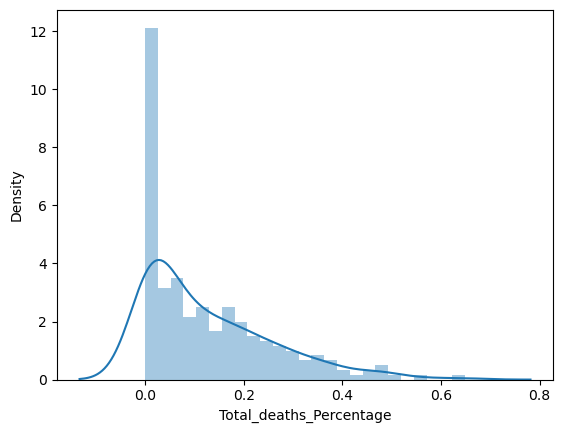

In [73]:
sns.distplot(df['Total_deaths_Percentage'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [77]:
df['Total_deaths_Percentage'].mean() # Check the mean

0.12678452552613975

In [80]:
df['Total_deaths_Percentage'].median() # Check the median

0.08509111371614582

In [83]:
df['Total_deaths_Percentage'].max() # Check the max

0.648557039809116

In [87]:
# Find the index of the maximum value in the 'deaths' column
max_deaths_index = df['Total_deaths_Percentage'].idxmax()

# Retrieve the country with the maximum deaths
country_with_max_deaths = df.loc[max_deaths_index, 'Location']
max_deaths_value = df.loc[max_deaths_index, 'Total_deaths_Percentage']

print(f"The country with the highest number of deaths is {country_with_max_deaths} with {max_deaths_value} Total_deaths_Percentage.")

The country with the highest number of deaths is Peru with 0.648557039809116 Total_deaths_Percentage.


In [90]:
duplicate_columns = df.columns[df.T.duplicated()]

In [92]:
column_hashes = df.apply(lambda x: hash(tuple(x)), axis=0)

In [94]:
duplicate_columns = df.columns[column_hashes.duplicated()]

In [96]:
df = df.loc[:, ~df.T.duplicated()]

In [98]:
df.head()

,Location,Max of total_cases,Max of total_deaths,Max of reproduction_rate,Max of people_vaccinated,Max of people_fully_vaccinated,Average of aged_65_older (in %),Average of gdp_per_capita (in USD),"Average of cardiovasc_death_rate (per 100,000)",Average of diabetes_prevalence (%),Average of female_smokers (%),Average of male_smokers (%),Average of life_expectancy (in years),Max of population,Total cases Percentage,Total deaths Percentage
0,United States of America,103436829,1189083,3.61,270227181,230637348,15.413,54225.446,151.089,10.79,19.1,24.6,78.86,338289856,30.576391,0.351498
1,China,99361338,122248,3.68,1310292000,1276760000,10.641,15308.712,261.899,9.74,1.9,48.4,76.91,1425887360,6.968386,0.008573
2,India,45040074,533619,2.67,1027438825,951990461,5.989,6426.674,282.280,10.39,1.9,20.6,69.66,1417173120,3.178163,0.037654
3,France,38997490,168091,3.09,54677678,53192478,19.718,38605.671,86.060,4.77,30.1,35.6,82.66,67813000,57.507395,0.247874
4,Germany,38437756,174979,3.00,64876299,63563414,21.453,45229.245,156.139,8.31,28.2,33.1,81.33,83369840,46.105109,0.209883


In [102]:
# Calculating percentage of vaccinated people
df['Vaccinated_People_Percentage'] = (df['Max of people_vaccinated'] / df['Max of population']) * 100

In [104]:
# Calculating total percentage of smokers in each country
df['Smokers_Percentage'] = (df['Average of female_smokers (%)'] + df['Average of male_smokers (%)'])

# Creating pair plots with percentage of total cases and total deaths

In [110]:
sub=df[['Total cases Percentage', 'Total deaths Percentage', 'Vaccinated_People_Percentage', 'Average of gdp_per_capita (in USD)', 'Average of diabetes_prevalence (%)', 'Average of aged_65_older (in %)', 'Smokers_Percentage']]

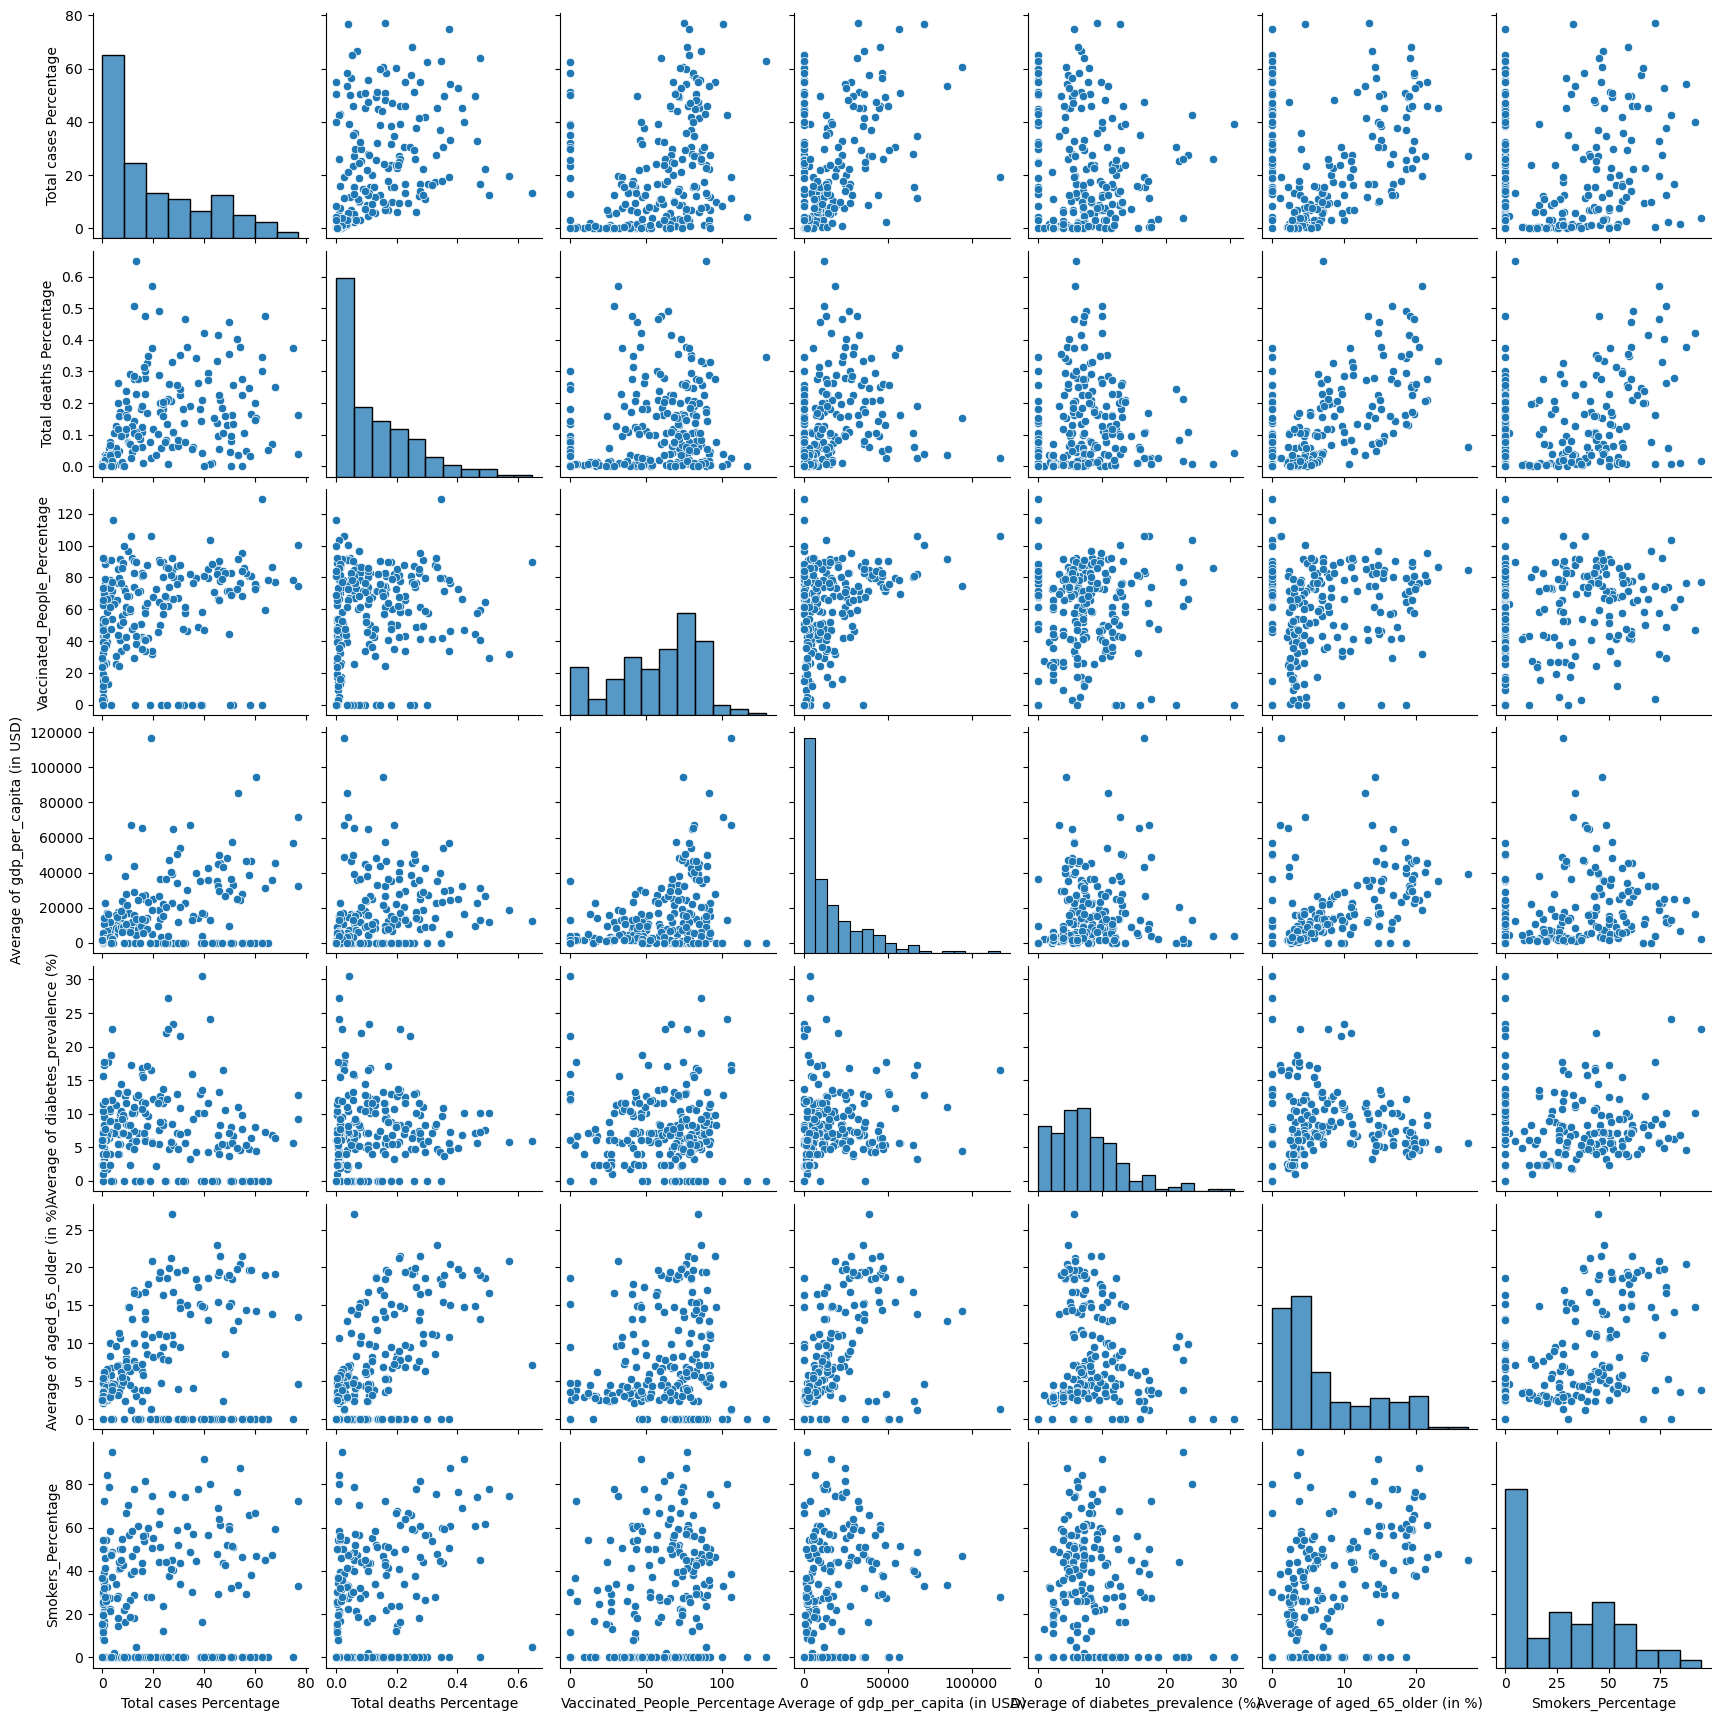

In [115]:
Pair_plot = sns.pairplot(sub)

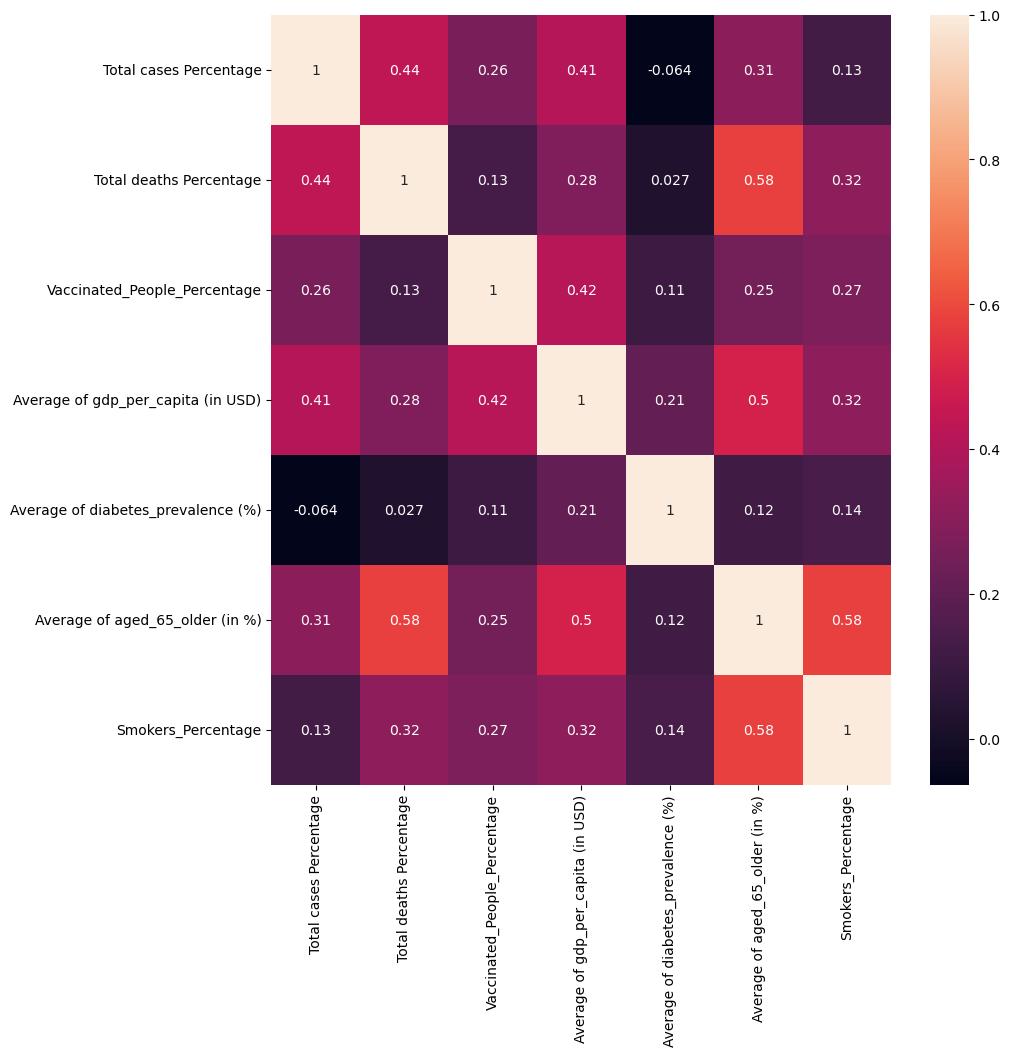

In [121]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

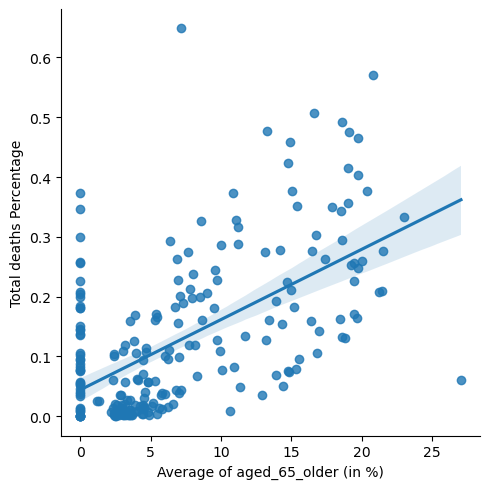

In [159]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = 'Average of aged_65_older (in %)', y = 'Total deaths Percentage', data = df)

# This shows a strong correlation between total death percentage and average % of 65 and above in a country.

# Data prep for regression analysis

In [161]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Average of aged_65_older (in %)'].values.reshape(-1,1)
y = df['Total deaths Percentage'].values.reshape(-1,1)

In [163]:
X

array([[15.413],
       [10.641],
       [ 5.989],
       [19.718],
       [21.453],
       [ 8.552],
       [13.914],
       [27.049],
       [23.021],
       [18.517],
       [14.178],
       [ 8.153],
       [19.436],
       [15.504],
       [ 7.15 ],
       [11.198],
       [18.779],
       [ 6.857],
       [ 5.44 ],
       [ 5.319],
       [16.763],
       [ 7.646],
       [19.202],
       [21.502],
       [20.396],
       [16.462],
       [11.087],
       [ 6.293],
       [18.571],
       [11.733],
       [16.984],
       [11.373],
       [19.027],
       [ 7.151],
       [18.436],
       [ 4.803],
       [ 5.344],
       [17.85 ],
       [19.677],
       [12.922],
       [19.985],
       [15.322],
       [17.366],
       [ 3.186],
       [18.577],
       [ 5.098],
       [15.07 ],
       [14.864],
       [ 3.81 ],
       [13.928],
       [ 4.495],
       [16.821],
       [ 6.991],
       [21.228],
       [19.002],
       [19.062],
       [20.801],
       [19.724],
       [ 6.769

In [165]:
y

array([[3.51498273e-01],
       [8.57346824e-03],
       [3.76537624e-02],
       [2.47874301e-01],
       [2.09882855e-01],
       [3.26090090e-01],
       [6.93494927e-02],
       [6.02605712e-02],
       [3.33823576e-01],
       [3.43824112e-01],
       [2.78503059e-01],
       [1.18839368e-01],
       [2.56214266e-01],
       [9.64037313e-02],
       [4.40038532e-02],
       [2.87554534e-01],
       [1.30869812e-01],
       [2.62745235e-01],
       [1.65822765e-01],
       [5.88229435e-02],
       [3.02864149e-01],
       [2.75141541e-01],
       [2.52068964e-01],
       [2.75770561e-01],
       [3.75879685e-01],
       [2.76864412e-01],
       [3.28927098e-01],
       [1.10055873e-01],
       [2.94605584e-01],
       [1.34479839e-01],
       [1.43294664e-01],
       [4.83492871e-02],
       [4.14580155e-01],
       [6.48557040e-01],
       [1.62325348e-01],
       [5.78613482e-02],
       [1.71294618e-01],
       [3.49987563e-01],
       [1.64341625e-01],
       [3.59054834e-02],


In [167]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis

In [169]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [171]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [173]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

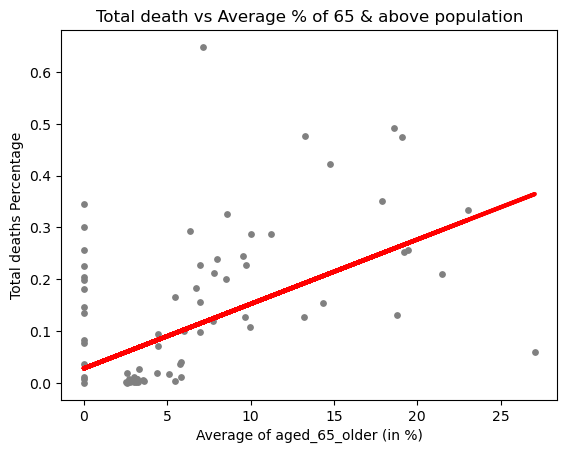

In [175]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total death vs Average % of 65 & above population')
plot_test.xlabel('Average of aged_65_older (in %)')
plot_test.ylabel('Total deaths Percentage')
plot_test.show()

In [180]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [183]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0124413]]
Mean squared error:  0.018324605173984203
R2 score:  0.1351820519036686


In [186]:
y_predicted

array([[0.027795  ],
       [0.08328321],
       [0.027795  ],
       [0.10020338],
       [0.15163573],
       [0.027795  ],
       [0.027795  ],
       [0.14873691],
       [0.07166303],
       [0.06646257],
       [0.12452613],
       [0.06479543],
       [0.06708463],
       [0.15238221],
       [0.06815459],
       [0.31420623],
       [0.10006653],
       [0.027795  ],
       [0.027795  ],
       [0.13419302],
       [0.027795  ],
       [0.25891708],
       [0.0617722 ],
       [0.20585493],
       [0.06679848],
       [0.07267078],
       [0.24987226],
       [0.10714563],
       [0.027795  ],
       [0.027795  ],
       [0.26960416],
       [0.06717172],
       [0.09910855],
       [0.027795  ],
       [0.05937103],
       [0.06202102],
       [0.11405055],
       [0.09547569],
       [0.16711271],
       [0.26495112],
       [0.3643198 ],
       [0.05966962],
       [0.09553789],
       [0.027795  ],
       [0.12389162],
       [0.19276668],
       [0.08283532],
       [0.068

In [190]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(10)

,Actual,Predicted
0,0.007880,0.027795
1,0.070301,0.083283
2,0.000000,0.027795
3,0.011229,0.100203
4,0.108291,0.151636
5,0.135602,0.027795
6,0.037172,0.027795
7,0.227940,0.148737
8,0.006139,0.071663
9,0.001292,0.066463


# Compare how the regression fits the training set

In [195]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [198]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [201]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0124413]]
Mean squared error:  0.008670842749390681
R2 score:  0.42785364117519276


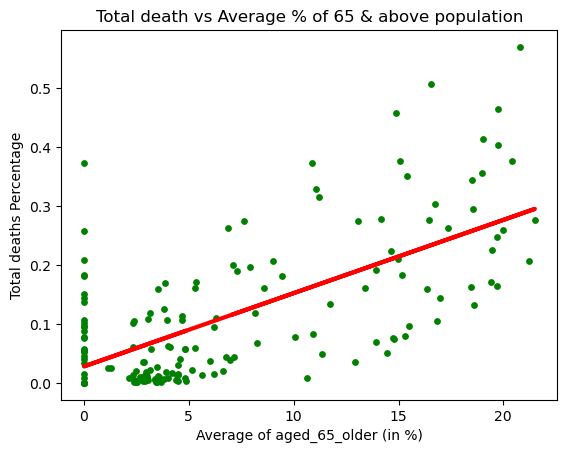

In [204]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total death vs Average % of 65 & above population')
plot_test.xlabel('Average of aged_65_older (in %)')
plot_test.ylabel('Total deaths Percentage')
plot_test.show()

# What I have learnt from the above analysis is that:

1. A coefficient of 0.6 suggests a moderate to strong positive linear relationship. This means that there is a notable tendency for the two variables (population of 65 and above AND total deaths) to move together in the same direction, though it is not a perfect relationship.

2. The regression model also implies the same. Though there is a tendency that a higher population of 65 & above might be at a higher risk of dying due to corona, but if considerable precautions are taken, a country might actually prevent it. 